# 0. Connected to Drive 



In [ ]:
# Mount with gdrive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# open existing text file
get_postags = "/content/gdrive/My Drive/MSBA_Spring2020/IDS576_DeepLearning/Project/get_postags.txt"
get_postags_list = open(get_postags).readlines()
# open existing text file
get_dependencies = "/content/gdrive/My Drive/MSBA_Spring2020/IDS576_DeepLearning/Project/get_dependencies.txt"
get_dependencies_list = open(get_dependencies).readlines()

In [ ]:
print(get_postags)
print(get_dependencies)


/content/gdrive/My Drive/MSBA_Spring2020/IDS576_DeepLearning/Project/get_postags.txt
/content/gdrive/My Drive/MSBA_Spring2020/IDS576_DeepLearning/Project/get_dependencies.txt


# 1. Spacy

In [ ]:
# SPACY 
import spacy
import string
from sklearn.preprocessing import FunctionTransformer
from spacy import displacy

In [ ]:
from spacy.lang.en import English 
nlp = English()
nlp.add_pipe(nlp.create_pipe('sentencizer'))

In [ ]:
def split_in_sentences(text):
    doc = nlp(text)
    return [str(sent).strip() for sent in doc.sents]

In [ ]:
path = "/content/gdrive/My Drive/MSBA_Spring2020/IDS576_DeepLearning/Project/The_Wizard_of_Oz.txt"
file = open(path, "r")
line = file.read().replace("\n","  ")
print(type(line))

<class 'str'>


In [ ]:
sents=split_in_sentences(line)
print(sents)

['INTRODUCTION.', 'Folk lore, legends, myths and fairy tales have fol-   lowed childhood through the ages, for every healthy   youngster has a wholesome and instinctive love for stories   fantastic, marvelous and manifestly unreal.', 'The winged   fairies of Grimm and Andersen have brought more happi-   ness to childish hearts than all other human creations.', 'Yet the old-time fairy tale, having served for genera-   tions, may now be classed as "historical" in the children\'s   library; for the time has come for a series of newer "won-   der tales" in which the stereotyped genie, dwarf and fairy   are eliminated, together with all the horrible and blood-   curdling incident devised by their authors to point a   fearsome moral to each tale.', 'Modern education includes   morality; therefore the modern child   seeks only entertainment in its wonder-   tales and gladly dispenses with all dis-   agreeable incident.', 'Having this thought in mind, the   story of \'The Wonderful Wizard of  

In [ ]:
import re
def preprocessor_final(text):
    if isinstance((text), (str)):
        text = re.sub('<[,^>.!]*>', ' ', text)
        text = re.sub('[\W]+', ' ', text.lower())
        return text
    if isinstance((text), (list)):
        return_list = []
        for i in range(len(text)):
            temp_text = re.sub('<[^>]*>', ' ', text[i])
            temp_text = re.sub('[\W]+', ' ', temp_text.lower())
            return_list.append(temp_text)
        return(return_list)
    else:
        pass

def all_in_one(text):
    preprocessed = preprocessor_final(text)
    nlp = spacy.load('en_core_web_sm')
    doc = nlp(preprocessed)
    #displacy.serve(doc, style='dep')
    list1= []
    list2= []
    for token in doc:
        list1.append(token.pos_)
    for token in doc:
        list2.append(token.dep_)
    #print(list1)
    return (list1, list2)


In [ ]:
# Test on one sentence
test = "Apple, This is first sentence."
get_postags, get_dependencies = all_in_one(test)

apple this is first sentence 


In [ ]:
# See the result
print("This is get_postags"+ str(get_postags))
print("This is get_dependencies"+ str(get_dependencies))

This is get_postags['PROPN', 'DET', 'AUX', 'ADJ', 'NOUN']
This is get_dependencies['npadvmod', 'nsubj', 'ROOT', 'amod', 'attr']


In [ ]:
# Print get_postags, get_dependencies of test sentence
print("This is get_postags:\n"+ str(get_postags))
print("\nThis is get_dependencies:\n"+ str(get_dependencies))

This is get_postags:
['PROPN', 'DET', 'AUX', 'ADJ', 'NOUN']

This is get_dependencies:
['npadvmod', 'nsubj', 'ROOT', 'amod', 'attr']


In [ ]:
# gutenburgtextdata
get_postags = []
get_dependencies =[]
for i in sents:
    postags, dependencies = all_in_one(i)
    get_postags.append(postags)
    get_dependencies.append(dependencies)

introduction 
folk lore legends myths and fairy tales have fol lowed childhood through the ages for every healthy youngster has a wholesome and instinctive love for stories fantastic marvelous and manifestly unreal 
the winged fairies of grimm and andersen have brought more happi ness to childish hearts than all other human creations 
yet the old time fairy tale having served for genera tions may now be classed as historical in the children s library for the time has come for a series of newer won der tales in which the stereotyped genie dwarf and fairy are eliminated together with all the horrible and blood curdling incident devised by their authors to point a fearsome moral to each tale 
modern education includes morality therefore the modern child seeks only entertainment in its wonder tales and gladly dispenses with all dis agreeable incident 
having this thought in mind the story of the wonderful wizard of oz was written solely to pleasure children of today 
it aspires to being a 

In [ ]:
# Print get_postags, get_dependencies of gutenburgtextdata
print("This is get_postags:\n"+ str(get_postags))
print("\nThis is get_dependencies:\n"+ str(get_dependencies))
print(len(get_postags))
print(len(get_dependencies))

This is get_postags:
[['NOUN'], ['PROPN', 'NOUN', 'NOUN', 'NOUN', 'CCONJ', 'NOUN', 'NOUN', 'AUX', 'PROPN', 'VERB', 'NOUN', 'ADP', 'DET', 'NOUN', 'ADP', 'DET', 'ADJ', 'NOUN', 'AUX', 'DET', 'ADJ', 'CCONJ', 'ADJ', 'NOUN', 'ADP', 'NOUN', 'ADJ', 'ADJ', 'CCONJ', 'ADV', 'ADJ'], ['DET', 'VERB', 'NOUN', 'ADP', 'NOUN', 'CCONJ', 'PROPN', 'AUX', 'VERB', 'ADV', 'ADJ', 'ADJ', 'PART', 'VERB', 'NOUN', 'SCONJ', 'DET', 'ADJ', 'ADJ', 'NOUN'], ['ADV', 'DET', 'ADJ', 'NOUN', 'NOUN', 'NOUN', 'VERB', 'VERB', 'ADP', 'ADJ', 'NOUN', 'VERB', 'ADV', 'AUX', 'VERB', 'ADV', 'ADJ', 'ADP', 'DET', 'NOUN', 'PART', 'NOUN', 'ADP', 'DET', 'NOUN', 'AUX', 'VERB', 'ADP', 'DET', 'NOUN', 'ADP', 'NOUN', 'VERB', 'NOUN', 'NOUN', 'ADP', 'DET', 'DET', 'VERB', 'PROPN', 'PROPN', 'CCONJ', 'NOUN', 'AUX', 'VERB', 'ADV', 'ADP', 'DET', 'DET', 'ADJ', 'CCONJ', 'NOUN', 'NOUN', 'NOUN', 'VERB', 'ADP', 'DET', 'NOUN', 'PART', 'VERB', 'DET', 'ADJ', 'NOUN', 'ADP', 'DET', 'NOUN'], ['ADJ', 'NOUN', 'VERB', 'NOUN', 'ADV', 'DET', 'ADJ', 'NOUN', 'VERB', '

# 2. Vectorization 

In [ ]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np
import tensorflow as tf
import torch

In [ ]:
from ast import literal_eval

def createLookUpDict(train_d):
  look_up_dict = {}
  index = 0
  for i in range(len(train_d)):
    #temp = literal_eval(train_d[i])
    temp = train_d[i]
    for k in temp:
        look_up_dict, index = addword(k, look_up_dict, index)
  return look_up_dict

In [ ]:
def addword(word, look_up_dict, ind):
    if word in look_up_dict:
        return [look_up_dict, ind]
    else:
        ind += 1
        look_up_dict.update({word: ind})
    return [look_up_dict, ind]

In [ ]:
get_dependencies_list = get_dependencies
get_postags_list = get_postags 

print(get_dependencies_list)
print(get_postags_list)
dep_look_up = createLookUpDict(get_dependencies_list)
post_look_up = createLookUpDict(get_postags_list)
print(dep_look_up)
print(post_look_up)

[['ROOT'], ['compound', 'nsubj', 'ccomp', 'dobj', 'cc', 'compound', 'conj', 'aux', 'advmod', 'ROOT', 'dobj', 'prep', 'det', 'pobj', 'mark', 'det', 'amod', 'nsubj', 'advcl', 'det', 'amod', 'cc', 'conj', 'dobj', 'prep', 'pobj', 'amod', 'amod', 'cc', 'advmod', 'conj'], ['det', 'amod', 'nsubj', 'prep', 'pobj', 'cc', 'conj', 'aux', 'ROOT', 'advmod', 'amod', 'dobj', 'aux', 'acl', 'dobj', 'prep', 'det', 'amod', 'amod', 'pobj'], ['advmod', 'det', 'amod', 'nsubjpass', 'compound', 'appos', 'aux', 'acl', 'prep', 'compound', 'pobj', 'aux', 'advmod', 'auxpass', 'nsubj', 'prep', 'amod', 'prep', 'det', 'poss', 'case', 'pobj', 'prep', 'det', 'pobj', 'aux', 'ROOT', 'prep', 'det', 'nsubj', 'prep', 'pobj', 'conj', 'compound', 'dobj', 'prep', 'pobj', 'det', 'amod', 'compound', 'nsubjpass', 'cc', 'conj', 'auxpass', 'relcl', 'advmod', 'prep', 'predet', 'det', 'amod', 'cc', 'compound', 'conj', 'pobj', 'acl', 'agent', 'poss', 'pobj', 'aux', 'xcomp', 'det', 'amod', 'dobj', 'prep', 'det', 'pobj'], ['amod', 'nsu

In [ ]:
# One-hot matrix of first to last letters (not including EOS) for input
def inputTensor(line, Max_Sent_length, look_up_dict):
    tensor = torch.zeros(Max_Sent_length, 1, len(look_up_dict))
    for li in range(len(line)):
        word = line[li]
        if word in look_up_dict.values():
            tensor[li][0][look_up_dict[word]] = 1
        else:
          tensor[li][0][len(look_up_dict)-1] = 1
    return tensor.int()

def sent_to_num(dep_line, d_up_dict, post_line, p_up_dict):
    length = len(dep_line)
    out = np.zeros((2, length))
    for i in range(length):
        if dep_line[i] in d_up_dict.keys():
            out[0][i] = d_up_dict[dep_line[i]]
        if post_line[i] in p_up_dict.keys():
            out[1][i] = p_up_dict[post_line[i]]
    return out

def sent_to_num_fixed(dep_line, d_up_dict, post_line, p_up_dict, outsize):
    length = outsize
    line_size = len(dep_line)
    out = np.zeros(length*2)
    if line_size <= length:
        for i in range(line_size):
            if dep_line[i] in d_up_dict.keys():
                out[i] = d_up_dict[dep_line[i]]
            if post_line[i] in p_up_dict.keys():
                out[length + i] = p_up_dict[post_line[i]]
    else:
        for i in range(length):
            if dep_line[i] in d_up_dict.keys():
                out[i] = d_up_dict[dep_line[i]]
            if post_line[i] in p_up_dict.keys():
                out[length + i] = p_up_dict[post_line[i]]
    return out

In [ ]:
Sent_length = 64
a = sent_to_num_fixed(get_dependencies_list[1], dep_look_up, get_postags_list[1], post_look_up, Sent_length)
print(a.shape)

(128,)


In [ ]:
outputs = []
#outputs = sent_to_num_fixed(get_dependencies[0], dep_look_up, get_postags[0], post_look_up, Sent_length)
Sent_length = 64
for i in range(len(get_dependencies)):
  input = sent_to_num_fixed(get_dependencies[i], dep_look_up, get_postags[i], post_look_up, Sent_length)
  outputs.append(input)
rawTrainingData =  np.array(outputs)
print(rawTrainingData)


[[ 1.  0.  0. ...  0.  0.  0.]
 [ 2.  3.  4. ...  0.  0.  0.]
 [11. 14.  3. ...  0.  0.  0.]
 ...
 [ 3.  1. 11. ...  0.  0.  0.]
 [11. 17. 19. ...  0.  0.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]]


In [ ]:
from torchvision.transforms import transforms
# define transforms
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, ), (0.5, ))
])

In [ ]:
#################################### Mai's ####################################

# Load library
# Create a vector as a row

training_data = np.array([[1, 2, 3, 4, 5, 6, 7, 8, 9, 10],[1, 2, 3, 4, 5, 6, 7, 8, 9, 10],[1, 2, 3, 4, 5, 6, 7, 8, 9, 10],[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]])
num_sen_trn = training_data.shape[0] # number of sentences in training data
dp_sen = training_data.shape[1] # sentence length x2 (dependency,postag)

# vector_row = np.array([[1, 2, 3],[4, 5, 6]]) ; 3[postag,dependency] * 2sentences
vector_row = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])


In [ ]:
from torch.utils.data import Dataset
from torch.utils.data import DataLoader

class CustomDataset(Dataset):
    def __init__(self, data, transforms=None):
        self.data = data
        self.transforms = transforms

    def __len__(self):
        return len(self.data)
    
    def __getitem__(self, idx):
        data = self.data[i, :]
        #data = np.asarray(data).astype(np.uint8)
        if self.transforms:
            data = self.transforms(data)
        else:
            data = data/50
        return data.astype(np.float32)

In [ ]:
print(rawTrainingData)
#train_data = CustomDataset(rawTrainingData, transform)
train_data = CustomDataset(rawTrainingData)

# dataloaders
trainloader = DataLoader(train_data, batch_size=32, shuffle=True)

[[ 1.  0.  0. ...  0.  0.  0.]
 [ 2.  3.  4. ...  0.  0.  0.]
 [11. 14.  3. ...  0.  0.  0.]
 ...
 [ 3.  1. 11. ...  0.  0.  0.]
 [11. 17. 19. ...  0.  0.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]]


# 3. GAN
https://github.com/udacity/deep-learning-v2-pytorch/blob/master/gan-mnist/MNIST_GAN_Solution.ipynb

*italicized text*## Create dummy vector

xxxxx

## Function, Discriminator, Generator 

In [ ]:

#Discriminator
import torch.nn as nn
import torch.nn.functional as F

class Discriminator(nn.Module):

    def __init__(self, input_size, hidden_dim, output_size):
        super(Discriminator, self).__init__()
        
        # define hidden linear layers
        self.fc1 = nn.Linear(input_size, hidden_dim)
        self.fc2 = nn.Linear(hidden_dim, hidden_dim)
        
        # final fully-connected layer
        self.fc3 = nn.Linear(hidden_dim, output_size)
        
        # dropout layer 
        self.dropout = nn.Dropout(0.3)
        
        
    def forward(self, x):
        # all hidden layers
        x = F.leaky_relu(self.fc1(x), 0.2) # (input, negative_slope=0.2)
        x = self.dropout(x)
        x = F.leaky_relu(self.fc2(x), 0.2)
        x = self.dropout(x)
        # final layer
        out = self.fc3(x)

        return out

In [ ]:
#Generator
class Generator(nn.Module):

    def __init__(self, input_size, hidden_dim, output_size):
        super(Generator, self).__init__()
        
        # define hidden linear layers
        self.fc1 = nn.Linear(input_size, hidden_dim)
        self.fc2 = nn.Linear(hidden_dim, hidden_dim)
        
        # final fully-connected layer
        self.fc3 = nn.Linear(hidden_dim, output_size)
        
        # dropout layer 
        self.dropout = nn.Dropout(0.3)

    def forward(self, x):
        # all hidden layers
        x = F.leaky_relu(self.fc1(x), 0.2) # (input, negative_slope=0.2)
        x = self.dropout(x)
        x = F.leaky_relu(self.fc2(x), 0.2)
        x = self.dropout(x)
        # final layer with tanh applied
        out = F.tanh(self.fc3(x))

        return out

In [ ]:
# Discriminator hyperparams
# Size of input sentence to discriminator
input_size = Sent_length*2
# Size of discriminator output (real or fake)
d_output_size = 1
# Size of last hidden layer in the discriminator
d_hidden_size = 16

# Generator hyperparams
# Size of latent vector to give to generator
z_size = 60
# Size of discriminator output (generated image)
g_output_size = Sent_length*2
# Size of first hidden layer in the generator
g_hidden_size = 16

In [ ]:
# Check Discriminator and Generator
D = Discriminator(input_size, d_hidden_size, d_output_size)
G = Generator(z_size, g_hidden_size, g_output_size)
print(D)
print(G)

Discriminator(
  (fc1): Linear(in_features=128, out_features=16, bias=True)
  (fc2): Linear(in_features=16, out_features=16, bias=True)
  (fc3): Linear(in_features=16, out_features=1, bias=True)
  (dropout): Dropout(p=0.3, inplace=False)
)
Generator(
  (fc1): Linear(in_features=60, out_features=16, bias=True)
  (fc2): Linear(in_features=16, out_features=16, bias=True)
  (fc3): Linear(in_features=16, out_features=128, bias=True)
  (dropout): Dropout(p=0.3, inplace=False)
)


In [ ]:
# Calculate losses
def real_loss(D_out, smooth=False):
    batch_size = D_out.size(0)
    # label smoothing
    if smooth:
        # smooth, real labels = 0.9
        labels = torch.ones(batch_size)*0.9
    else:
        labels = torch.ones(batch_size) # real labels = 1
        
    # numerically stable loss
    criterion = nn.BCEWithLogitsLoss()
    # calculate loss
    loss = criterion(D_out.squeeze(), labels)
    return loss

def fake_loss(D_out):
    batch_size = D_out.size(0)
    labels = torch.zeros(batch_size) # fake labels = 0
    criterion = nn.BCEWithLogitsLoss()
    # calculate loss
    loss = criterion(D_out.squeeze(), labels)
    return loss

In [ ]:
#Optimizer
import torch.optim as optim

# Optimizers
lr = 0.00002

# Create optimizers for the discriminator and generator
d_optimizer = optim.Adam(D.parameters(), lr)
g_optimizer = optim.Adam(G.parameters(), lr)

## Training

In [ ]:
#
import pickle as pkl

# training hyperparams
num_epochs = 20

# keep track of loss and generated, "fake" samples
samples = []
losses = []

print_every = 400

# Get some fixed data for sampling. These are images that are held
# constant throughout training, and allow us to inspect the model's performance
sample_size = 8
fixed_z = np.random.uniform(-1, 1, size=(sample_size, z_size))
fixed_z = torch.from_numpy(fixed_z).float()

# train the network
D.train()
G.train()

for epoch in range(num_epochs):
    
  #for batch_i, (real_sent, _) in enumerate(trainloader):
  for batch_i, data in enumerate(trainloader):
    batch_size = data.size(0)
    # ============================================
    #            TRAIN THE DISCRIMINATOR
    # ============================================
        
    d_optimizer.zero_grad()
        
    # 1. Train with real images

    # Compute the discriminator losses on real images 
    # smooth the real labels
    D_real = D(data)
    d_real_loss = real_loss(D_real, smooth=True)
        
    # 2. Train with fake images
        
    # Generate fake images
    # gradients don't have to flow during this step
    with torch.no_grad():
      z = np.random.uniform(-1, 1, size=(batch_size, z_size))
      z = torch.from_numpy(z).float()
      fake_vectors = G(z)
        
    # Compute the discriminator losses on fake images        
    D_fake = D(fake_vectors)
    d_fake_loss = fake_loss(D_fake)
        
    # add up loss and perform backprop
    d_loss = d_real_loss + d_fake_loss
    d_loss.backward()
    d_optimizer.step()
        
        
    # =========================================
    #            TRAIN THE GENERATOR
    # =========================================
    g_optimizer.zero_grad()
        
    # 1. Train with fake images and flipped labels
        
    # Generate fake images
    z = np.random.uniform(-1, 1, size=(batch_size, z_size))
    z = torch.from_numpy(z).float()
    fake_images = G(z)
        
    # Compute the discriminator losses on fake images 
    # using flipped labels!
    D_fake = D(fake_vectors)
    g_loss = real_loss(D_fake) # use real loss to flip labels
        
    # perform backprop
    g_loss.backward()
    g_optimizer.step()

    # Print some loss stats
    if batch_i % print_every == 0:
      # print discriminator and generator loss
      print('Epoch [{:5d}/{:5d}] | d_loss: {:6.4f} | g_loss: {:6.4f}'.format(
            epoch+1, num_epochs, d_loss.item(), g_loss.item()))

    
    ## AFTER EACH EPOCH##
    # append discriminator loss and generator loss
    losses.append((d_loss.item(), g_loss.item()))
    
    # generate and save sample, fake images
    G.eval() # eval mode for generating samples
    samples_z = G(fixed_z)
    samples.append(samples_z)
    G.train() # back to train mode

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1698: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch [    1/   20] | d_loss: 1.3843 | g_loss: 0.7164
Epoch [    2/   20] | d_loss: 1.3813 | g_loss: 0.7254
Epoch [    3/   20] | d_loss: 1.3887 | g_loss: 0.7478
Epoch [    4/   20] | d_loss: 1.3630 | g_loss: 0.7428
Epoch [    5/   20] | d_loss: 1.3478 | g_loss: 0.7591
Epoch [    6/   20] | d_loss: 1.3448 | g_loss: 0.7866
Epoch [    7/   20] | d_loss: 1.3322 | g_loss: 0.7748
Epoch [    8/   20] | d_loss: 1.3307 | g_loss: 0.8089
Epoch [    9/   20] | d_loss: 1.3149 | g_loss: 0.8370
Epoch [   10/   20] | d_loss: 1.3109 | g_loss: 0.8560
Epoch [   11/   20] | d_loss: 1.2672 | g_loss: 0.9212
Epoch [   12/   20] | d_loss: 1.2407 | g_loss: 0.9119
Epoch [   13/   20] | d_loss: 1.2638 | g_loss: 0.9321
Epoch [   14/   20] | d_loss: 1.2171 | g_loss: 0.9606
Epoch [   15/   20] | d_loss: 1.1995 | g_loss: 0.9558
Epoch [   16/   20] | d_loss: 1.1893 | g_loss: 1.0707
Epoch [   17/   20] | d_loss: 1.1554 | g_loss: 1.0243
Epoch [   18/   20] | d_loss: 1.1701 | g_loss: 1.1080
Epoch [   19/   20] | d_loss

## Analysis


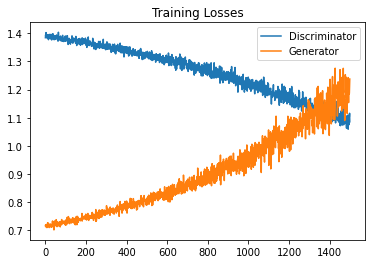

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
losses = np.array(losses)
plt.plot(losses.T[0], label='Discriminator')
plt.plot(losses.T[1], label='Generator')
plt.title("Training Losses")
plt.legend()

In [ ]:
def nums_to_Sent(sent):
  indexes = unnormalize(sent)
  depend, postag = sent_to_num_fixed(indexes, dep_look_up, post_look_up, Sent_length)
  return depend, postag

def unnormalize(sent):
  out = []
  sent = sent.detach().numpy().tolist()
  for i in sent:
    temp = round(i*50)
    if temp < 0:
      temp = 0
    out.append(temp)
  return out

def sent_to_num_fixed(index, dep_look_up, post_look_up, Sent_length):
  depend = []
  postag = []

  dep_key_list = list(dep_look_up.keys())
  dep_val_list = list(dep_look_up.values())
  
  post_key_list = list(post_look_up.keys())
  post_val_list = list(post_look_up.values())
  
  for i in range(Sent_length):
    if index[i] in dep_val_list:
      position = dep_val_list.index(index[i])    
      depend.append(dep_key_list[position])
    else:
      depend.append('N/A')

    if index[i+Sent_length] in post_val_list:
      position = post_val_list.index(index[i+Sent_length])    
      postag.append(post_key_list[position])
    else:
      postag.append('N/A')
    
  return depend, postag

In [ ]:

# randomly generated, new latent vectors
sample_size=16
rand_z = np.random.uniform(-1, 1, size=(sample_size, z_size))
rand_z = torch.from_numpy(rand_z).float()

G.eval() # eval mode
# generated samples
new_vectors = G(rand_z)

depend, postag = nums_to_Sent(new_vectors[0])
print(depend)
print(postag)

['compound', 'dobj', 'N/A', 'ROOT', 'N/A', 'appos', 'amod', 'amod', 'N/A', 'N/A', 'amod', 'prep', 'det', 'amod', 'N/A', 'ccomp', 'N/A', 'conj', 'N/A', 'compound', 'N/A', 'ROOT', 'N/A', 'N/A', 'advcl', 'N/A', 'N/A', 'N/A', 'mark', 'amod', 'N/A', 'N/A', 'N/A', 'cc', 'amod', 'N/A', 'N/A', 'advcl', 'conj', 'appos', 'N/A', 'advmod', 'ccomp', 'N/A', 'mark', 'N/A', 'appos', 'acl', 'cc', 'N/A', 'N/A', 'cc', 'N/A', 'compound', 'N/A', 'N/A', 'dobj', 'N/A', 'compound', 'dobj', 'N/A', 'conj', 'ROOT', 'nsubj']
['N/A', 'N/A', 'CCONJ', 'CCONJ', 'N/A', 'N/A', 'N/A', 'N/A', 'NUM', 'ADP', 'AUX', 'N/A', 'DET', 'N/A', 'N/A', 'INTJ', 'SYM', 'N/A', 'N/A', 'SCONJ', 'NOUN', 'N/A', 'ADP', 'ADP', 'SYM', 'N/A', 'N/A', 'N/A', 'ADJ', 'NOUN', 'INTJ', 'VERB', 'ADJ', 'N/A', 'N/A', 'N/A', 'X', 'N/A', 'AUX', 'N/A', 'N/A', 'VERB', 'N/A', 'ADV', 'ADV', 'CCONJ', 'SCONJ', 'NOUN', 'N/A', 'N/A', 'X', 'N/A', 'PRON', 'N/A', 'N/A', 'AUX', 'ADJ', 'N/A', 'N/A', 'PRON', 'N/A', 'N/A', 'N/A', 'SYM']


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1698: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
